# Problem Statement -
Classify the description of E-commerce products into 4 categories by implementing any NLP approach for analysis and   modeling on the provided dataset. The objective is to recognize whether the given description is related to Electronics (0), Households (1), Books (2), or Clothing & Accessories (3) products.

## Text Classification Pipeline:
-> Data Acquistion
-> Text Preparation:-
   a)Text Cleanup
   b)Basic Preprocessing
   c)Advance Preprocessing

-> Feature Engineering
-> Modelling:-
   a) Model Building
   b)Evaluation
-> Deployment   

# Data Acquistion :- 
   Here we have data given in CSV format.

In [1]:
## Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


In [2]:
## Reading data from csv file
df = pd.read_csv("ecommerceDataset.csv")


In [3]:
## Loading dataset
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


# Text Preparation

In [ ]:
## Basic Preprocessing

In [ ]:
## Column heading is not in proper format, So I have to rename it.

In [4]:
## Renamed column heading into proper format:-
df.rename(columns ={'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.':'Product_desc'},
inplace = True)

In [5]:
df.head()

,Household,Product_desc
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [6]:
df.shape

(50424, 2)

There are 50424 rows and 2 columns present in  given dataset.

As we know we have to classify text into product categories, one of them is Household,Here our column heading is Household,that's not appropriate in this case. so I'll rename "Household" heading to "categories".

In [7]:
df.rename(columns= {'Household':'Categories'},inplace = True)

In [8]:
## Check column heading after renaming:
df.head()

,Categories,Product_desc
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [9]:
## Checking value counts for each class/categories 
df['Categories'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Categories, dtype: int64

In [10]:
## Check datatypes:
df.dtypes

Categories      object
Product_desc    object
dtype: object

 Both  column data types are in string form.

In [11]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Categories    50424 non-null  object
 1   Product_desc  50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


So from above information, there is one missing value in product_desc column.

In [12]:
## Check again for null values:
df.isnull().sum()

Categories      0
Product_desc    1
dtype: int64

Since there is only one missing value present, So I'll fill that with 'Description not available'

In [13]:
df['Product_desc'].fillna('Description not available',inplace = True)

In [14]:
df.isnull().sum()

Categories      0
Product_desc    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Categories Pie Chart')

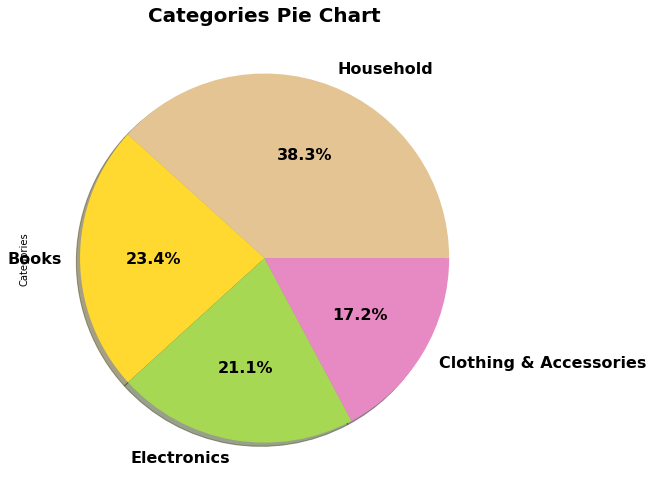

In [15]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
plt.subplots(1,1,figsize=(15,7))

df['Categories'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, shadow=True)
plt.title('Categories Pie Chart', fontsize=20,fontweight ='bold')


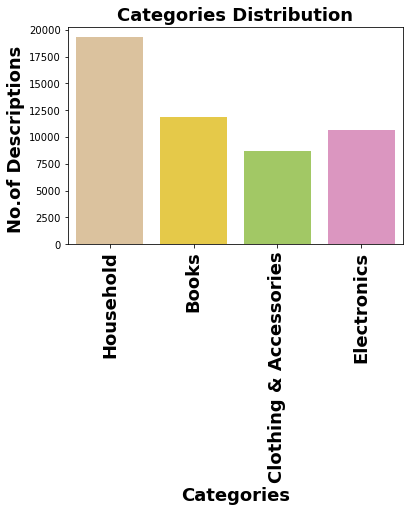

Value Counts of Categories:


Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Categories, dtype: int64

In [16]:
sns.countplot('Categories',data=df)
plt.title('Categories Distribution',fontsize=18,fontweight ='bold')
plt.xlabel("Categories",fontsize=18,fontweight ='bold')
plt.ylabel("No.of Descriptions ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold',rotation = 90)
plt.tight_layout()
plt.show()
print('Value Counts of Categories:')
df['Categories'].value_counts()


# Text Cleaning

In [17]:
df['length_before_cleaning'] = df['Product_desc'].map(lambda Product_desc: len(Product_desc))


In [18]:
df

,Categories,Product_desc,length_before_cleaning
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",346
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,1316
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",1091
3,Household,Incredible Gifts India Wooden Happy Birthday U...,989
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,1745
...,...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,546
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,100
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,1653
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",1977


Text Mining
Operation perform are as followed:

-> converting string into lower case.

-> Removing Punctuations and other special characters

-> Word Tokenzation

-> Removing Stop Words

-> Stemming and Lemmatising

-> Applying Count Vectoriser


In [19]:
#Import required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud


In [20]:
df['Product_desc'][50406]

'Microsoft Lumia 535 (Black, 8GB) Colour:Black   Product Description High Definition Visuals This Smartphone from the Microsoft Lumia series offers you a great viewing experience through its 5-inches LCD multi-touch capacitive touch screen (qHD IPS). The resolution of 960 x 540 pixels sharply refines the picture quality of the display. Also, the screen’s density of 220 ppi pixels and 16M colour support adds brightness and beautiful range of colours to the images on screen. Windows Phone Processor This phone from Microsoft is equipped with the Windows Phone Operating System (v8.1) which gives an efficient platform for the apps to run smoothly. The Snapdragon 200 quad core processor of 1.2 GHz and 1GB RAM make sure that you experience fast and seamless functioning of this Lumia 535. So, you can now comfortably flip through ‘n’ number of apps on your phone at a smooth and fast pace. Stay Connected with Video Calling If you are primarily looking for a phone which can fulfill your video con

# Applying Regular expression for text extraction.


In [21]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()
    
    # Removing puctuations
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', '')
    
    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'number')
    
    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
    


In [22]:
clean_text(df, 'Product_desc')
df['Product_desc'].head()


0    saf floral framed painting wood number inch x ...
1    saf uv textured modern art print framed painti...
2    saf flower print framed painting synthetic num...
3    incredible gifts india wooden happy birthday u...
4    pitaara box romantic venice canvas painting nu...
Name: Product_desc, dtype: object

In [23]:
df['Product_desc'][50406]

'microsoft lumia number black numbergb colourblack product description high definition visuals smartphone microsoft lumia series offers great viewing experience numberinches lcd multitouch capacitive touch screen qhd ips resolution number x number pixels sharply refines picture quality display also screens density number ppi pixels numberm colour support adds brightness beautiful range colours images screen windows phone processor phone microsoft equipped windows phone operating system vnumber gives efficient platform apps run smoothly snapdragon number quad core processor number ghz numbergb ram make sure experience fast seamless functioning lumia number comfortably flip n number apps phone smooth fast pace stay connected video calling primarily looking phone fulfill video conferencing well skype chat needs microsoft lumia number smartphone look forward view beautiful charming faces folks even sitting miles away home impressive feature smartphone comes two hitech cameras number megapi

Now text seems to be in proper format.

In [24]:
df['length_after_cleaning'] = df['Product_desc'].map(lambda Product_desc: len(Product_desc))
df


,Categories,Product_desc,length_before_cleaning,length_after_cleaning
0,Household,saf floral framed painting wood number inch x ...,346,275
1,Household,saf uv textured modern art print framed painti...,1316,862
2,Household,saf flower print framed painting synthetic num...,1091,700
3,Household,incredible gifts india wooden happy birthday u...,989,656
4,Household,pitaara box romantic venice canvas painting nu...,1745,1411
...,...,...,...,...
50419,Electronics,strontium microsd class number numbergb memory...,546,461
50420,Electronics,crossbeats wave waterproof bluetooth wireless ...,100,83
50421,Electronics,karbonn titanium wind wnumber white karbonn ti...,1653,1319
50422,Electronics,samsung guru fm plus smbnumbered black colourb...,1977,1553


In [25]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_desc'] = df['Product_desc'].apply(lambda x: tokenizer.tokenize(x))
df.head()


,Categories,Product_desc,length_before_cleaning,length_after_cleaning
0,Household,"[saf, floral, framed, painting, wood, number, ...",346,275
1,Household,"[saf, uv, textured, modern, art, print, framed...",1316,862
2,Household,"[saf, flower, print, framed, painting, synthet...",1091,700
3,Household,"[incredible, gifts, india, wooden, happy, birt...",989,656
4,Household,"[pitaara, box, romantic, venice, canvas, paint...",1745,1411


# Stemming & Lemmatization

In [26]:
import gensim
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result


In [27]:
#Processing review with above Function
processed_review = []

for doc in df.Product_desc:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]


50424


[['saf',
  'floral',
  'frame',
  'paint',
  'wood',
  'number',
  'inch',
  'number',
  'inch',
  'special',
  'effect',
  'print',
  'textur',
  'saonumb',
  'paint',
  'make',
  'synthet',
  'frame',
  'textur',
  'print',
  'give',
  'multi',
  'effect',
  'attract',
  'toward',
  'special',
  'seri',
  'paint',
  'make',
  'wall',
  'beauti',
  'give',
  'royal',
  'touch',
  'perfect',
  'gift',
  'special',
  'one'],
 ['saf',
  'textur',
  'modern',
  'art',
  'print',
  'frame',
  'paint',
  'synthet',
  'number',
  'number',
  'number',
  'set',
  'number',
  'colormulticolor',
  'sizenumb',
  'number',
  'number',
  'overview',
  'beauti',
  'paint',
  'involv',
  'action',
  'skill',
  'use',
  'paint',
  'right',
  'manner',
  'henc',
  'end',
  'product',
  'pictur',
  'speak',
  'thousand',
  'word',
  'say',
  'art',
  'trend',
  'quit',
  'time',
  'give',
  'differ',
  'viewer',
  'differ',
  'mean',
  'style',
  'design',
  'saf',
  'wood',
  'matt',
  'abstract',
  '

In [28]:
df['clean_review'] = processed_review  #Assigning this to the dataframe
df.head()


,Categories,Product_desc,length_before_cleaning,length_after_cleaning,clean_review
0,Household,"[saf, floral, framed, painting, wood, number, ...",346,275,"[saf, floral, frame, paint, wood, number, inch..."
1,Household,"[saf, uv, textured, modern, art, print, framed...",1316,862,"[saf, textur, modern, art, print, frame, paint..."
2,Household,"[saf, flower, print, framed, painting, synthet...",1091,700,"[saf, flower, print, frame, paint, synthet, nu..."
3,Household,"[incredible, gifts, india, wooden, happy, birt...",989,656,"[incred, gift, india, wooden, happi, birthday,..."
4,Household,"[pitaara, box, romantic, venice, canvas, paint...",1745,1411,"[pitaara, box, romant, venic, canva, paint, nu..."


In [29]:
df['Product_desc'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()


,Categories,Product_desc,length_before_cleaning,length_after_cleaning,clean_review
0,Household,saf floral frame paint wood number inch number...,346,275,"[saf, floral, frame, paint, wood, number, inch..."
1,Household,saf textur modern art print frame paint synthe...,1316,862,"[saf, textur, modern, art, print, frame, paint..."
2,Household,saf flower print frame paint synthet number in...,1091,700,"[saf, flower, print, frame, paint, synthet, nu..."
3,Household,incred gift india wooden happi birthday uniqu ...,989,656,"[incred, gift, india, wooden, happi, birthday,..."
4,Household,pitaara box romant venic canva paint numbermm ...,1745,1411,"[pitaara, box, romant, venic, canva, paint, nu..."


# Plotting Wordcloud for different categories

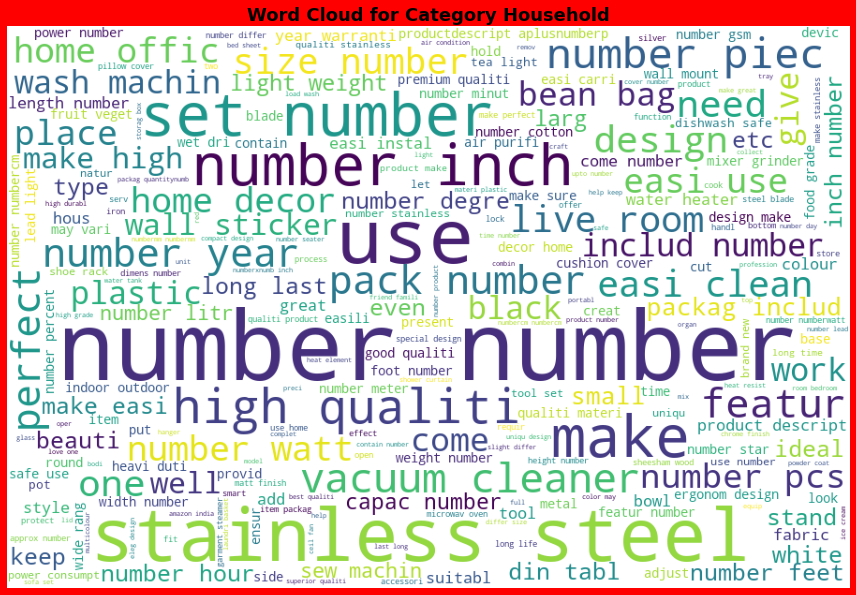

In [30]:
one = df['Product_desc'][df['Categories']=='Household']
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Category Household',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


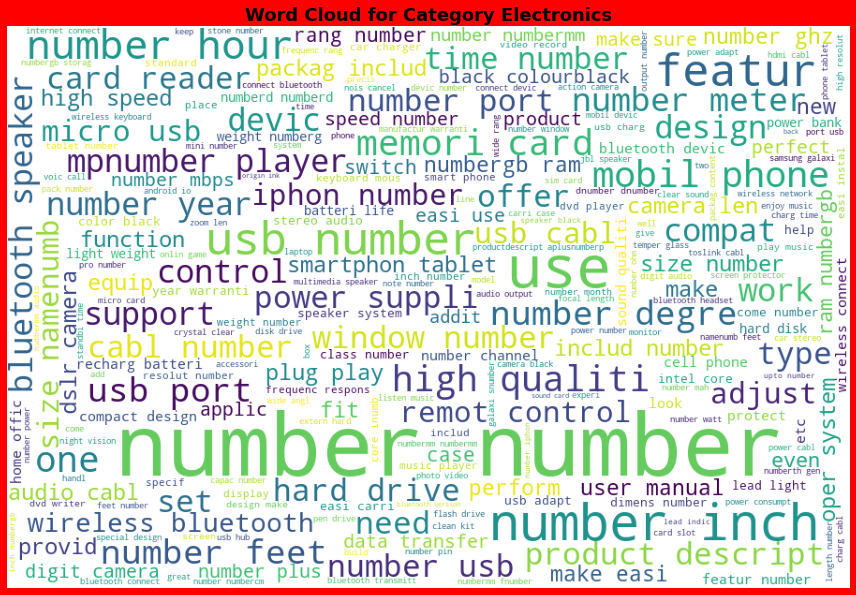

In [31]:
one = df['Product_desc'][df['Categories']=='Electronics']
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Category Electronics',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


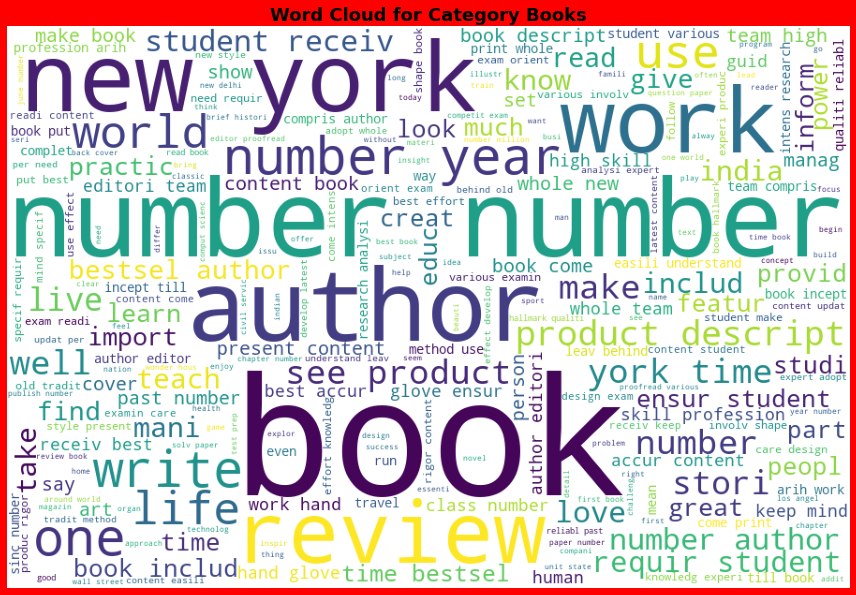

In [32]:
one = df['Product_desc'][df['Categories']=='Books']
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Category Books',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


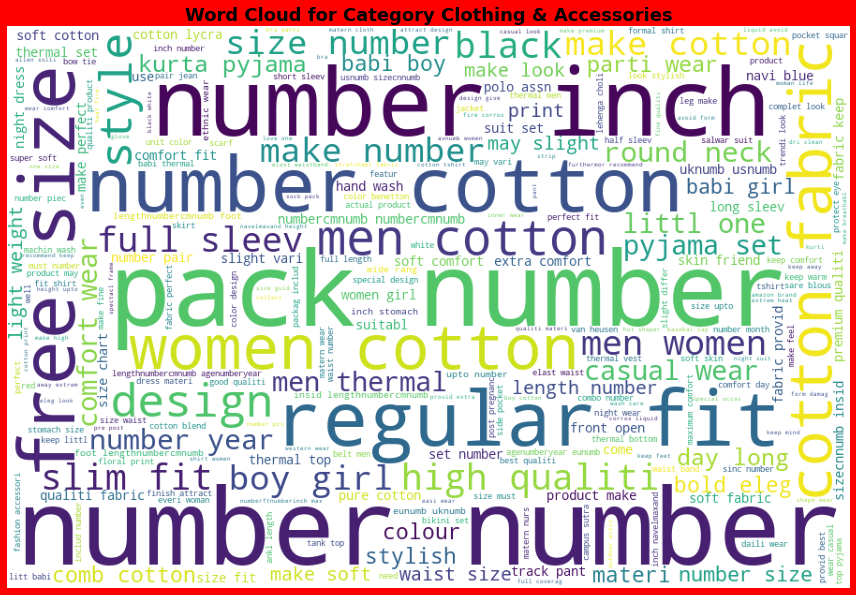

In [33]:
one = df['Product_desc'][df['Categories']=='Clothing & Accessories']
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Category Clothing & Accessories',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


In [34]:
X = df['Product_desc']
y = df['Categories']

In [35]:
X.shape

(50424,)

In [36]:
y.shape

(50424,)

# Label Encoding

In [37]:
## Encoding categories in numerical format
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)
y

array([3, 3, 3, ..., 2, 2, 2])

# Text Vectorization to convert text into numeric


In [38]:
tfid = TfidfVectorizer()
X = tfid.fit_transform(X)


In [39]:
X.shape

(50424, 82562)

# Model Building

In [40]:
## Since this is a classification problem, so import classification based libraries.
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate, cross_val_predict,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score


# Train Test Split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)


In [42]:
X_train.shape, y_train.shape


((40339, 82562), (40339,))

In [43]:
def sort_model(estimator, X_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, X_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes


In [45]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_model(models[model], X_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])




Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.9646496105773542 - (std: 0.0006707782143529634)
Precision: 0.9647617134852899 - (std: 0.0006678805277963934)
Recall: 0.9646496105773542 - (std: 0.0006707782143529634)
f1: 0.9646184080553709 - (std: 0.000672850654909765)


Step 2 of 7
....................................................................running MultinomialNB
Accuracy: 0.9360916405421895 - (std: 0.001066940887911613)
Precision: 0.9397040028191634 - (std: 0.001155716234832682)
Recall: 0.9360916405421895 - (std: 0.001066940887911613)
f1: 0.9362496116382596 - (std: 0.0010616675666208855)


Step 3 of 7
....................................................................running Random Forest
Accuracy: 0.9680953865614448 - (std: 0.0011377495565632848)
Precision: 0.9683598955664248 - (std: 0.0011084097640109134)
Recall: 0.9680953865614448 - (std: 0.0011377495565632848)
f1: 0.968076838067595 - (std: 0.0011417106

In [46]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)


,Model,accuracy,precision,recall,f1
2,Random Forest,0.968095,0.968360,0.968095,0.968077
0,LogisticRegression,0.964650,0.964762,0.964650,0.964618
4,KNeighbors,0.958403,0.958478,0.958403,0.958380
3,Decision Tree,0.942686,0.942800,0.942686,0.942679
1,MultinomialNB,0.936092,0.939704,0.936092,0.936250
6,Gradient Boosting,0.916111,0.918593,0.916111,0.915986
5,Ada Boost,0.830536,0.838077,0.830536,0.830088


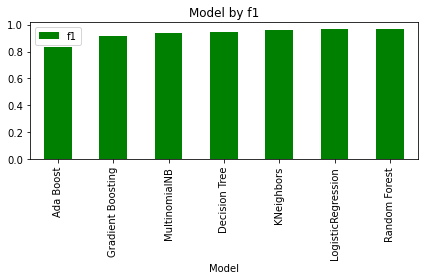

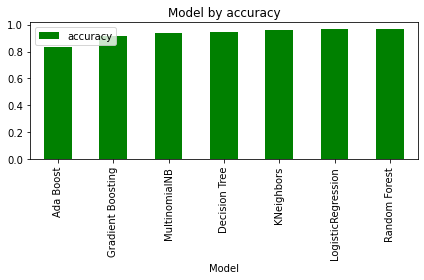

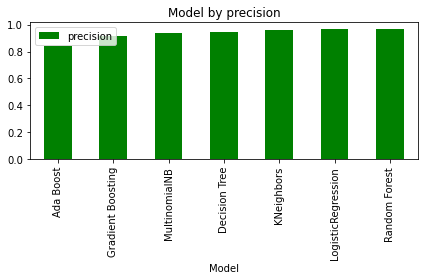

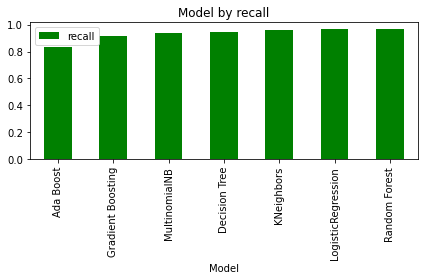

In [47]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'green')
    plt.title(f"Model by {metric}")
    plt.show()


# Hyperparameter Tuning

In [49]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

rf  = RandomForestClassifier(random_state = 100,)
rf_random = RandomizedSearchCV(rf,param_grid,cv = 3,)
rf_random.fit(X_train,y_train)
params = rf_random.best_params_
print("Best Params are ",params)
best_score = rf_random.best_score_
print("Best Score is ",rf_random.best_score_)


Best Params are  {'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best Score is  0.9595180725103853


So our model is performing better with default parameters. So I'll save my model with default parameters.

In [51]:
rf_final = RandomForestClassifier()
rf_final.fit(X_train,y_train)
rf_pred = rf_final.predict(X_test)
print('Final Random Forest Classifier Model')
print('Accuracy Score :', accuracy_score(y_test, rf_pred))
print('\n')
print('Confusion matrix of Random Forest Classifier :',confusion_matrix(y_test, rf_pred))
print('\n')
print('Classification Report of Random Forest Classifier: ',classification_report(y_test, rf_pred))


Final Random Forest Classifier Model
Accuracy Score : 0.9747149231531979


Confusion matrix of Random Forest Classifier : [[2243    8   14   43]
 [   4 1688    2   27]
 [  17    3 2071   80]
 [  25   12   20 3828]]


Classification Report of Random Forest Classifier:                precision    recall  f1-score   support

           0       0.98      0.97      0.98      2308
           1       0.99      0.98      0.98      1721
           2       0.98      0.95      0.97      2171
           3       0.96      0.99      0.97      3885

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.98     10085
weighted avg       0.97      0.97      0.97     10085



# Confusion Matrix for final model


In [53]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, rf_pred))


Confusion matrix:

 [[[7731   46]
  [  65 2243]]

 [[8341   23]
  [  33 1688]]

 [[7878   36]
  [ 100 2071]]

 [[6050  150]
  [  57 3828]]]


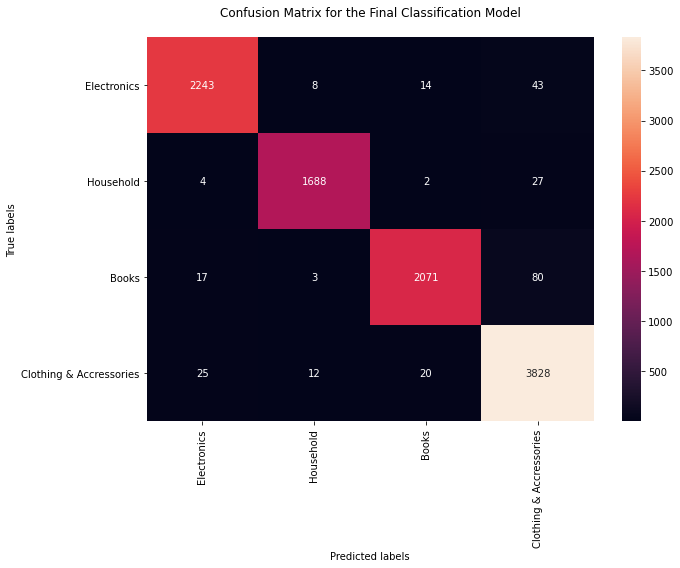

In [56]:
import matplotlib.ticker as plticker
Product_Categories = ['Electronics','Household','Books','Clothing & Accressories']

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test), np.asarray(rf_pred))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_xticklabels(Product_Categories); ax.set_yticklabels(Product_Categories);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()


# Saving the final model

In [57]:
import pickle
filename = 'Ecommerce_Text_Classification.pkl'
pickle.dump(rf_final,open(filename,'wb'))


# Conclusion

In [58]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
X_test.shape

(10085, 82562)

In [60]:
a = np.array(y_test)
a


array([0, 0, 0, ..., 3, 0, 3])

In [61]:
predict = rf_final.predict(X_test)
pd.DataFrame({"Original" : np.ravel(a),
              "Predicted" : predict,
             }
            )


,Original,Predicted
0,0,0
1,0,0
2,0,0
3,2,2
4,3,3
...,...,...
10080,1,1
10081,1,1
10082,3,0
10083,0,0


** Note - I have checked duplicate values, There is more than 22k duplicate values are present, First i have dropped duplicate values but performance was very poor due to less data, So I keep those values and built this final model.